![SG_Banner](SG_Banner.png)

<center>Copyright by Super Genii, Inc.</center>
<center><em>For more information, visit us at <a href='https://supergenii.com'>supergenii.com</a></em></center>

# Project:   Brexit Fallout: Impact on Students too Young to Vote in the 2016 Referendum and Exclusion from the Erasmus Scheme

## Overview
I recently read an article stating that the EU committee recommends allowing British students back into the free movement scheme (https://www.independent.co.uk/news/uk/politics/eu-brexit-erasmus-student-passport-b2522582.html, April 4, 2024). The aftermath of Brexit has left many British students out of the Erasmus scheme, depriving them of the invaluable opportunity to study and gain experiences across Europe. This loss has not only impacted their academic pursuits but also hindered their personal and professional growth. The exclusion from Erasmus has created barriers to cultural exchange, language learning, and international collaboration, potentially limiting their future opportunities in an increasingly globalized world. Students are now understandably frustrated and angry, feeling the weight of consequences they had no say in, as others voted on their behalf.

## Goal
The goal of the project is to analyze the actual referendum results to investigate if there is a relationship between supporting Brexit and demographic factors such as age and education level. Specifically, we aim to determine if older adults without college degrees, who may not fully grasp the implications of excluding future students from opportunities like the Erasmus scheme, were more likely to support Brexit.
In addition, we plan to analyze data from a survey conducted a few weeks before the referendum occurred by a group of researchers from the British Election Study (BES). This analysis will help us understand if the referendum results were predictable leading up to the vote. By doing so, we aim to identify if targeted campaigns highlighting the loss of future opportunities for students could have been used to influence public opinion.




## The Data

The file 'UK_districts.csv' contains the referendum results on Brexit aggregated at the district level. The dataset is from the entire population of interest; each observation represents the residents of a particular district.  
The file 'BES.csv' contains the survey data. The survey was conducted between April 14 and May 4, 2016, and the referendum took place on June 23.

All personally identifying information has been removed from the data.

Acknowledgements  
Actual referendum results: Based on Sascha O. Becker, Thiemo Fetzer, and Dennis Novy, "Who Voted for Brexit? A Comprehensive District-Level Analysis," _Economic Policy_ 32, no. 92 (2017): 601-50.  
Survey: Based on Sara B. Hobolt, "The Brexit Vote: A Divided Nation, a Divided Continent," _Journal of European Public Policy_ 23, no. 9 (2016): 1259-77. The data come from Wave 7 of the British Election Study.

(Datasets downloaded from "Data Analysis for Social Science," Elena Llaudet and Kosuke Imai - Princeton University Press.)

## <div style="text-align: center">Data Column Reference</div>

Actual referendum results: 'UK_districts.csv'  

| **Variable** | **Description** |
|:---------|:---------|
| name |   Name of the district |
| leave | Vote share received by the leave camp in the district in percentages |
| high_education | Proportion of district's residents with an undergraduate degree, professional qualification, or equivalent (in percentages)|


Survey: 'BES.csv'  

| **Variable** | **Description** |
|:---------|:---------|
| vote |   Respondent's vote intention in the EU referendum: "leave", "stay", "don't know", "won't vote" |
| leave | Identify leave voters: 1 = intends to vote 'leave' or 0 = intends to vote 'stay' |
| education | Respondent's highest educational qualification: 1 = no qualification, 2 = general certificate of secondary education (GCSE), 3 = general certificate of education advanced level (GCE A level), 4 = undergraduate degree, 5 = postgraduate degree  |
| age | Respondent's age in years |  

-----

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Get the data and display it

In [2]:
brexit = pd.read_csv('Data/UK_districts.csv')
survey = pd.read_csv('Data/BES.csv')

In [3]:
brexit.head()

,name,leave,high_education
0,Birmingham,50.42,22.98
1,Cardiff,39.98,32.33
2,Edinburgh City,25.56,21.92
3,Glasgow City,33.41,25.91
4,Liverpool,41.81,22.44


In [4]:
survey.head()

,vote,leave,education,age
0,leave,1.0,3.0,60
1,leave,1.0,NaN,56
2,stay,0.0,5.0,73
3,leave,1.0,4.0,64
4,don't know,NaN,2.0,68


## Clean the data

### Examine the data

In [5]:
brexit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            380 non-null    object 
 1   leave           380 non-null    float64
 2   high_education  380 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.1+ KB


In [6]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30895 entries, 0 to 30894
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vote       30895 non-null  object 
 1   leave      28044 non-null  float64
 2   education  27470 non-null  float64
 3   age        30895 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 965.6+ KB


<u>Potential problems:</u>
- leave and education contain null values
- change education type to integer

### Improve the readability

In [7]:
# rename column names 
brexit.columns = ['district_name', 'pct_leave', 'pct_high_education']

### Drop duplicate rows

In [8]:
# check for duplicated rows: brexit
brexit[brexit.duplicated(keep=False)]

,district_name,pct_leave,pct_high_education
380,NaN,NaN,NaN
381,NaN,NaN,NaN


In [9]:
# drop rows with all missing values
brexit = brexit.drop_duplicates(keep=False)

#### There could be duplicated rows in the 'survey' file, but they may represent different respondents who happen to share the same features. Since there is no way to determine if these duplicates are valid or not, we will not drop any rows based on duplication.

### Find and fix missing values

In [10]:
survey.isnull().sum()

vote            0
leave        2851
education    3425
age             0
dtype: int64

#### Two variables contain missing values: 'leave' and 'education.' We are interested in measuring characteristics of supporters and non-supporters. We will use education level in our analysis. We do not have info to fill the NAs with reasonable values. Therefore, we need to exclude respondents for whom we have a missing value in either variable.

In [11]:
# drop rows with missing 'leave' and/or 'education'

survey = survey.dropna(subset=['leave','education'], how='any')

In [12]:
survey.head()

,vote,leave,education,age
0,leave,1.0,3.0,60
2,stay,0.0,5.0,73
3,leave,1.0,4.0,64
5,stay,0.0,4.0,85
6,leave,1.0,3.0,78


In [13]:
survey.isnull().sum()

vote         0
leave        0
education    0
age          0
dtype: int64

### Change data types

In [14]:
# BES survey data: change float values in 'education' column to integers

survey['education'] = survey['education'].astype(int)

In [15]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25097 entries, 0 to 30894
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vote       25097 non-null  object 
 1   leave      25097 non-null  float64
 2   education  25097 non-null  int64  
 3   age        25097 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 980.4+ KB


### Save and retrieve DataFrame

In [16]:
brexit.to_pickle('brexit.pkl')
survey.to_pickle('survey.pkl')

In [17]:
brexit = pd.read_pickle('brexit.pkl')
survey = pd.read_pickle('survey.pkl')

-----

# Relationship between Education and the Leave vote in the Entire UK

## Analyze the data

In [18]:
avg_x = brexit['pct_high_education'].mean()
avg_y = brexit['pct_leave'].mean()

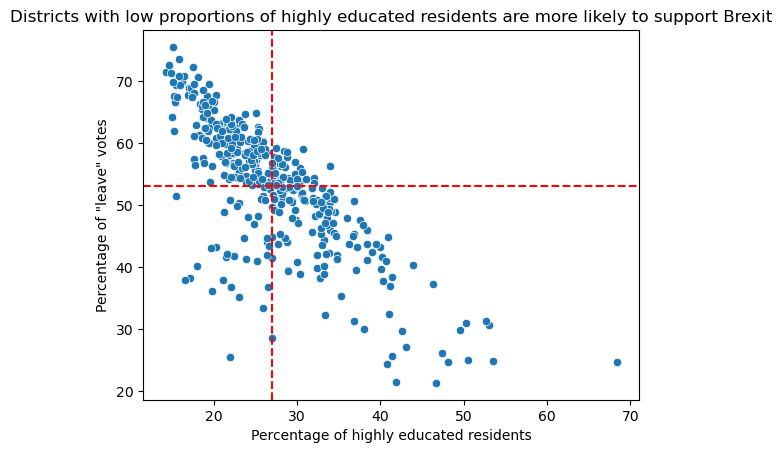

In [19]:
ax = sns.scatterplot(data=brexit, x='pct_high_education', y='pct_leave')

# Add vertical and horizontal lines passing through the averages
plt.axvline(x=avg_x, color='r', linestyle='--')
plt.axhline(y=avg_y, color='r', linestyle='--')

ax.set(title='Districts with low proportions of highly educated residents are more likely to support Brexit',
      xlabel='Percentage of highly educated residents', ylabel='Percentage of "leave" votes');

## Note: 
- districts with values of _high-education_ below the mean tend to have values of _leave_ above the mean;
- districts with values of _high-education_ above the mean tend to have values of _leave_ below the mean.

In [20]:
brexit[['pct_high_education','pct_leave']].corr()

,pct_high_education,pct_leave
pct_high_education,1.000000,-0.763318
pct_leave,-0.763318,1.000000


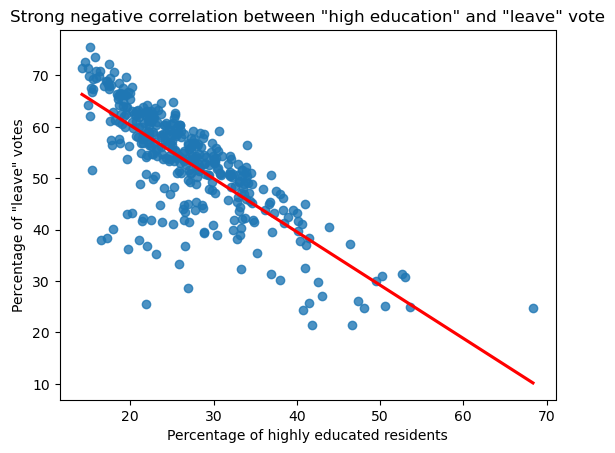

In [21]:
sns.regplot(data=brexit, x='pct_high_education', y='pct_leave', scatter=True, 
            ci=None, line_kws={'color':'red'})

plt.title('Strong negative correlation between "high education" and "leave" vote')
plt.xlabel('Percentage of highly educated residents')
plt.ylabel('Percentage of "leave" votes');

#### The strong negative correlation between "high education" and "leave" vote suggests that voters less highly educated were more inclined to support Brexit. This trend implies that this group may not have fully grasped the implications of Brexit regarding the exclusion of future students from opportunities like the Erasmus scheme. 
However, we do not know whether voters' level of education and support for Brexit are _causally_ related in any way.

-----

# Measuring Support for Brexit

#### Let's examine the BES survey data to see if a similar relationship could be identified a few weeks before the referendum occurred. Specifically, we are going to examine the characteristics of Brexit supporters and non-supporters determining how these two groups compare in terms of education level and age. If the sample is representative, characteristics should appear in similar proportions in the sample (_respondents_) as in the population as a whole (_eligible voters_).

In [22]:
# proportion of voters intending to vote stay or leave in the EU referendum

round(survey['vote'].value_counts(normalize=True) * 100, 1)

stay     52.8
leave    47.2
Name: vote, dtype: float64

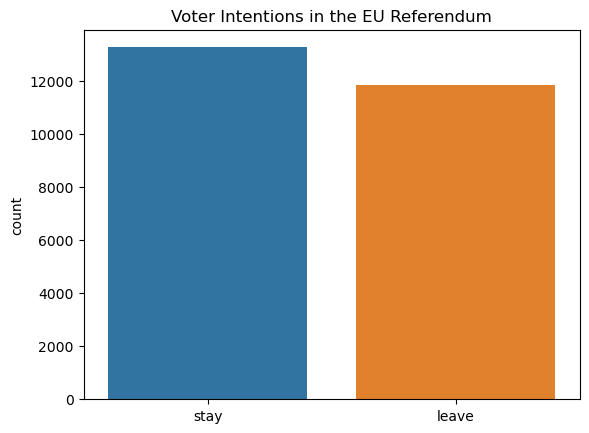

In [23]:
sns.countplot(data=survey, x='leave')

plt.gca().set_xticklabels(['stay', 'leave'])
plt.xlabel('')
plt.title('Voter Intentions in the EU Referendum');

#### Based on the proportions in the sample, we can estimate that when the survey was administered, a slight majority of eligible UK voters intended to vote 'stay.'

---

In [24]:
survey['leave'].mean()

0.47188907040682154

We can state that 47.19% of respondents were in favor of Brexit (wanted to leave the EU). We cannot infer that about 47% of _all_ UK voters were in favor of Brexit, but we can construct a measure of uncertainty for the sample mean.

In [25]:
# construct 95% confidence interval for polls (z-test for one-sample population proportion)

x_bar = survey['leave'].mean()
n = survey.shape[0]

lower = survey['leave'].mean() - 1.96 * np.sqrt((x_bar * (1 - x_bar)) / n)
upper = survey['leave'].mean() + 1.96 * np.sqrt((x_bar * (1 - x_bar)) / n)

print(f'95% confidence interval: [{lower}, {upper}]')

95% confidence interval: [0.46571278007185385, 0.47806536074178924]


The true support for Brexit among _all_ UK voters in the weeks leading to the referendum was likely to be between 46.57% and 47.81%. In other words, the likely proportion of support for Brexit among all UK voters was 47.19% with a margin of error of 0.62 percentage points (47.19% $\pm$ 0.62 p.p.).

---

In [24]:
# proportion of respondents' highest level of education

round(survey['education'].value_counts(normalize=True) * 100, 1)

4    39.3
3    22.7
2    20.5
5    10.1
1     7.4
Name: education, dtype: float64

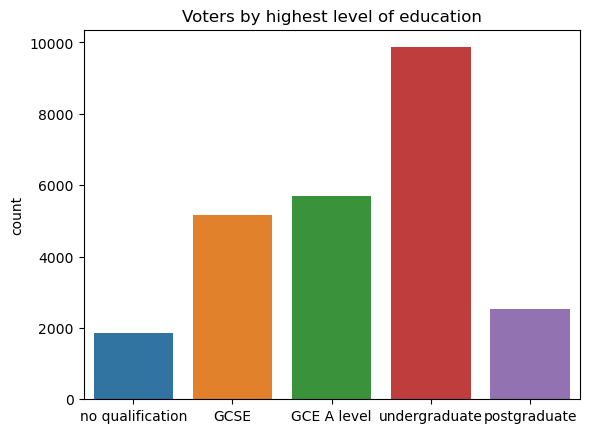

In [25]:
sns.countplot(data=survey, x='education')

plt.gca().set_xticklabels(['no qualification','GCSE','GCE A level','undergraduate','postgraduate'])
plt.xlabel('')
plt.title('Voters by highest level of education')
plt.tight_layout;

#### Largest group of respondents holds undergraduate degrees. Smallest group of respondents has no qualifications.  
#### If the sample is representative, the same characteristic should appear in similar proportions in the sample as in the entire eligible UK voter population.

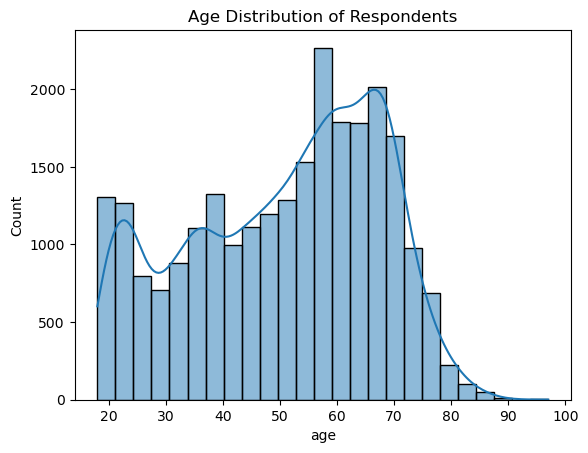

In [26]:
sns.histplot(data=survey, x='age', kde=True, bins=25)

plt.title('Age Distribution of Respondents');

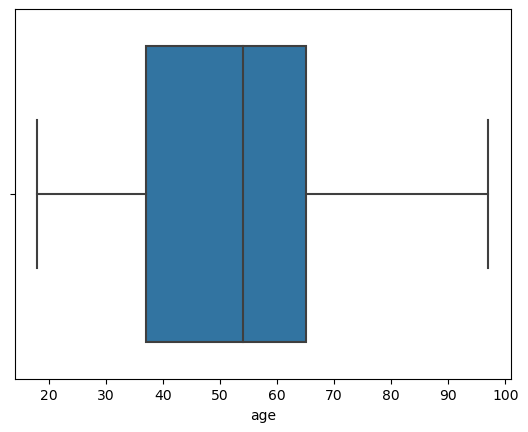

In [27]:
sns.boxplot(data=survey, x='age');

#### It can be estimated that 50% of voters were between 37 and 65 years old.

In [28]:
survey['age'].describe()

count    25097.000000
mean        50.749213
std         16.768727
min         18.000000
25%         37.000000
50%         54.000000
75%         65.000000
max         97.000000
Name: age, dtype: float64

-----

### Relationship between level of education and support for Brexit.

In [29]:
pd.crosstab(survey['vote'], survey['education'], margins=True, margins_name='All respondents')

education,1,2,3,4,5,All respondents
vote,,,,,,
leave,1356,3388,2685,3783,631,11843
stay,498,1763,3014,6081,1898,13254
All respondents,1854,5151,5699,9864,2529,25097


In [30]:
round(pd.crosstab(survey['vote'], survey['education'], margins=True, 
                  margins_name='All respondents', normalize=True) * 100, 1)

education,1,2,3,4,5,All respondents
vote,,,,,,
leave,5.4,13.5,10.7,15.1,2.5,47.2
stay,2.0,7.0,12.0,24.2,7.6,52.8
All respondents,7.4,20.5,22.7,39.3,10.1,100.0


Among respondents with no educational qualification (_education = 1_), there were more Brexit supporters than non-supporters.

In contrast, among respondents with the highest educational qualification (_education = 5_), there were more non-supporters than supporters.

In [31]:
round(pd.crosstab(survey['vote'], survey['education'], normalize='index') * 100, 1)

education,1,2,3,4,5
vote,,,,,
leave,11.4,28.6,22.7,31.9,5.3
stay,3.8,13.3,22.7,45.9,14.3


#### Among all Brexit supporters, 11.4% had no educational qualification. In contrast, among all Brexit non-supporters, close to 46% had an undergraduate degree.

In [32]:
round(pd.crosstab(survey['vote'], survey['education'], normalize='columns') * 100, 1)

education,1,2,3,4,5
vote,,,,,
leave,73.1,65.8,47.1,38.4,25.0
stay,26.9,34.2,52.9,61.6,75.0


#### Among all respondents with no educational qualification, 73% were Brexit supporters. This phenomenon reverses with higher levels of education. Among respondents with the equivalent of a high school diploma (_education = 3_), Brexit supporters are in the minority by a slight margin (47% vs. 53%). 

### Infer the level of education of Brexit supporters and non-supporters among all eligible UK voters:
If the BES sample is representative of all eligible UK voters, we can infer that voters with low levels of education were likely to support Brexit, and voters with high levels of education were likely to oppose Brexit.

Results show that a targeted campaign could have been implemented in the weeks leading up to the referendum, focusing on voters with low levels of education. The aim would be to raise awareness of the implications for future students who may lose access to the Erasmus scheme.

### Relationship between age and support for Brexit.

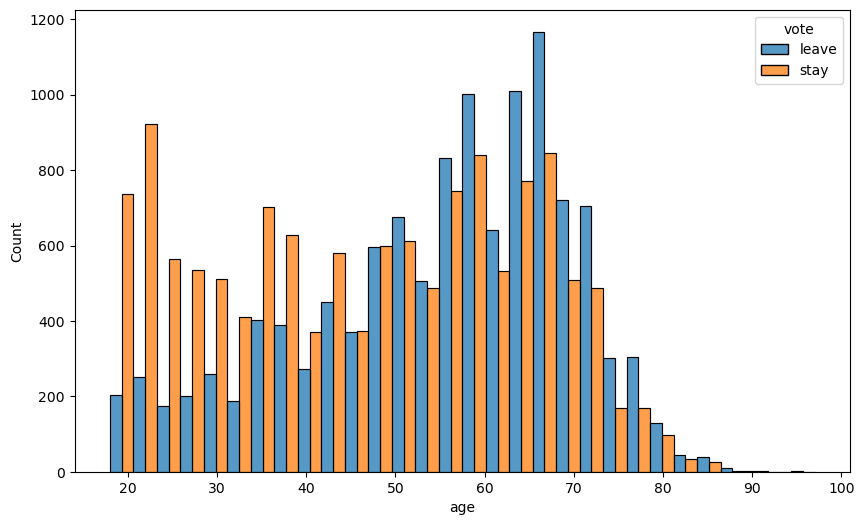

In [33]:
plt.figure(figsize=(10,6))

sns.histplot(data=survey, x='age', hue='vote', multiple='dodge', bins=30);

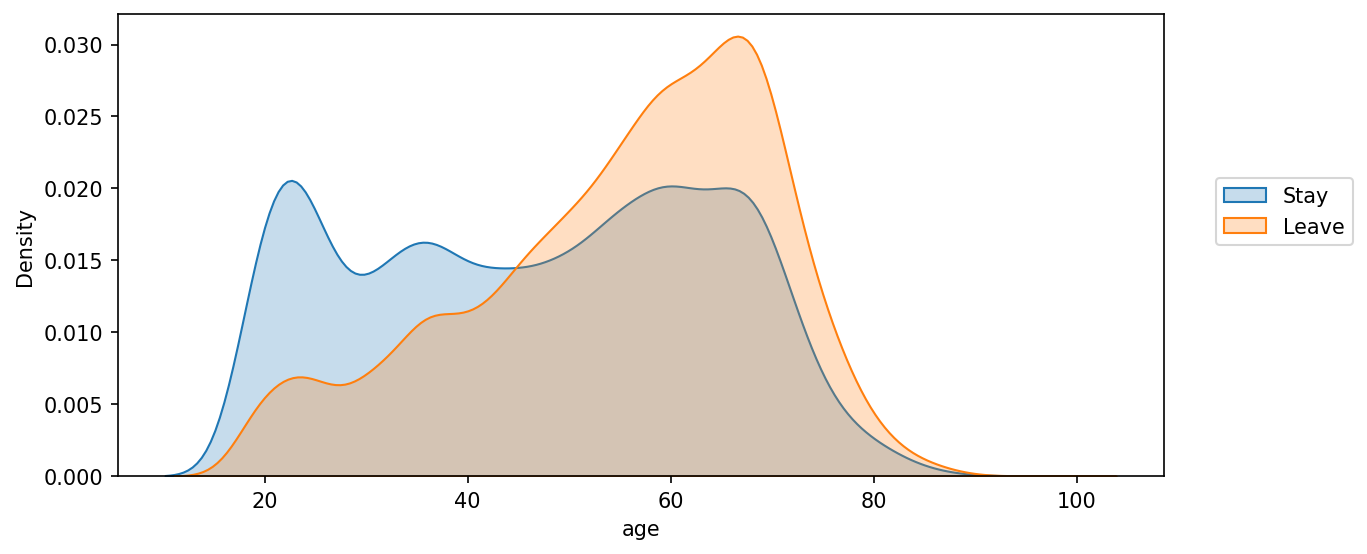

In [36]:
plt.figure(figsize=(9,4), dpi=150)

sns.kdeplot(data=survey.query('leave == 0'), x='age', fill=True, legend=True, label='Stay')
sns.kdeplot(data=survey.query('leave == 1'), x='age', fill=True, legend=True, label='Leave')

plt.legend(loc=(1.05, 0.5));

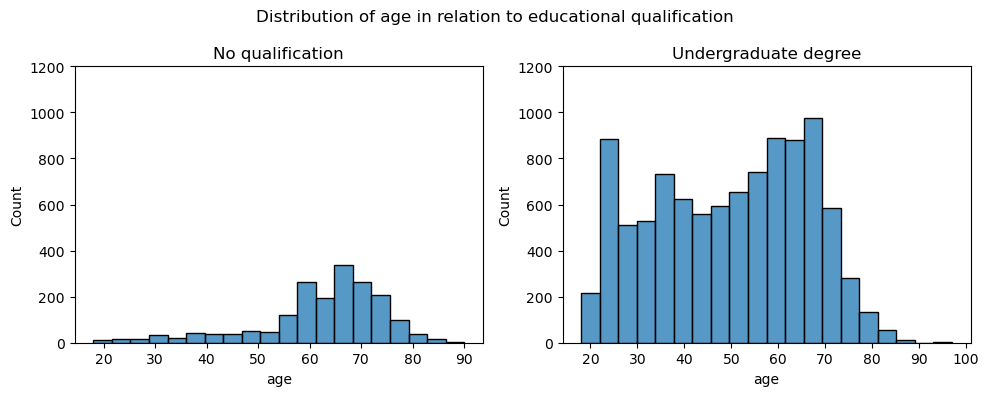

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.suptitle('Distribution of age in relation to educational qualification')

# Plot the histograms
sns.histplot(ax=axs[0], data=survey.query('education == 1'), x='age', bins=20)
axs[0].set_title('No qualification')
axs[0].set_ylim(0, 1200)  # Set y-axis limits for the first subplot

sns.histplot(ax=axs[1], data=survey.query('education == 4'), x='age', bins=20)
axs[1].set_title('Undergraduate degree')
axs[1].set_ylim(0, 1200)  # Set y-axis limits for the second subplot

# Show the plots
plt.tight_layout()

#### The proportion of respondents between 20 and 25 years old among Brexit non-supporters is close to three times the proportion of respondents in the same age group among supporters. In addition, the proportion of respondents between 65 and 70 years old among Brexit supporters is about one and a half times the proportion of respondents in the same age group among non-supporters.

Results show that a targeted campaign could have been implemented in the weeks leading up to the referendum, focusing on voters with low levels of education and age between 65 and 70. The aim would be to raise awareness of the implications for future students who may lose access to the Erasmus scheme.

-----